<a href="https://colab.research.google.com/github/jiorjioo/ngabyogyokartoz-spotify-eda/blob/main/%5Bngabyogyokartoz%5D_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NGABYOGJOKARTOZ EXPLORATORY DATA ANALYSIS**

I did fun project using Spotify audio features data from several Indonesian local band scene: The Jeblogs, MORFEM, The Kick, FSTVLST, Jenny, and more.
The data was scraped from Spotify API. In this notebook I'll try to explore and gain several unique facts about their music.

Read my article here: https://medium.com/@balmabahira/ngabyogjokartoz-spotify-eda-bunga-rampai-2-5320d9543387

**Disclaimer:** you will see some differences between what I wrote there and here, because I revised it for publishing purpose (yes my article is going to featured in a zine!)

## Data Overview

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
df = pd.read_csv('scraping_data_ngab_1.csv')


In [ ]:
# Top 5 data
df.head()

,Unnamed: 0,nama_band,genre,nama_album,tipe,tgl_rilis,judul_lagu,track_popularity,durasi,energy,danceability,tempo,instrumentalness,loudness,speech,liveness,valence
0,0,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Menari Resah,37,194358,0.774,0.360,155.003,0.7060,-7.039,0.0371,0.420,0.453
1,1,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Bersandarlah,47,260000,0.835,0.412,142.960,0.1660,-6.537,0.0404,0.639,0.290
2,2,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Pulang,36,213507,0.731,0.438,122.963,0.5240,-6.440,0.0404,0.126,0.407
3,3,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Sambutlah,45,301143,0.861,0.496,138.031,0.2410,-6.767,0.0441,0.456,0.546
4,4,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Lautan Api,35,189016,0.766,0.489,164.912,0.0939,-6.636,0.0323,0.107,0.561


In [ ]:
# Least 5 data
df.tail()

,Unnamed: 0,nama_band,genre,nama_album,tipe,tgl_rilis,judul_lagu,track_popularity,durasi,energy,danceability,tempo,instrumentalness,loudness,speech,liveness,valence
680,680,Eka Annash,[],Voice Of Humanity,compilation,2021-03-05,Bencana - Acapella Version,5,156215,0.325,0.379,64.938,0.000000,-6.146,0.0271,0.1340,0.196
681,681,Eka Annash,[],Voice Of Humanity,compilation,2021-03-05,Senyum Hari Esok - Acapella Version,0,257103,0.355,0.748,119.997,0.000009,-5.773,0.0360,0.0944,0.329
682,682,Eka Annash,[],Voice Of Humanity,compilation,2021-03-05,Sabar Adalah Koentji,0,240000,0.637,0.721,80.060,0.000000,-4.728,0.1780,0.7180,0.618
683,683,Eka Annash,[],In The Dark (feat. Eka Annash),single,2021-11-12,In The Dark (feat. Eka Annash),1,352667,0.798,0.537,90.005,0.002150,-7.932,0.0599,0.4100,0.341
684,684,Eka Annash,[],Dunia Dalam Berita,single,2020-12-20,Dunia Dalam Berita,0,239187,0.946,0.610,91.994,0.005990,-5.024,0.0584,0.1980,0.318


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 684
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nama_band         341 non-null    object 
 1   genre             341 non-null    object 
 2   nama_album        341 non-null    object 
 3   tipe              341 non-null    object 
 4   tgl_rilis         341 non-null    object 
 5   judul_lagu        341 non-null    object 
 6   track_popularity  341 non-null    int64  
 7   durasi            341 non-null    int64  
 8   energy            341 non-null    float64
 9   danceability      341 non-null    float64
 10  tempo             341 non-null    float64
 11  instrumentalness  341 non-null    float64
 12  loudness          341 non-null    float64
 13  speech            341 non-null    float64
 14  liveness          341 non-null    float64
 15  valence           341 non-null    float64
 16  TahunRilis        341 non-null    object 
dtypes:

## Data Cleaning

### Drop kolom Unnamed : 0

In [ ]:
df.describe()

,track_popularity,durasi,energy,danceability,tempo,instrumentalness,loudness,speech,liveness,valence
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,27.504399,3.772496,0.820094,0.471783,133.891384,0.203761,-6.029413,0.061706,0.204547,0.501678
std,18.111521,1.148326,0.163244,0.132105,27.383962,0.306245,2.422319,0.049144,0.154853,0.236970
min,0.000000,0.332083,0.241000,0.135000,67.915000,0.000000,-15.768000,0.024600,0.037600,0.057700
25%,12.000000,3.150267,0.745000,0.386000,117.619000,0.000058,-7.304000,0.035000,0.099900,0.320000
50%,26.000000,3.733333,0.881000,0.470000,134.938000,0.008060,-5.818000,0.045500,0.146000,0.503000
75%,41.000000,4.333333,0.943000,0.552000,149.951000,0.367000,-4.444000,0.066000,0.281000,0.657000
max,78.000000,8.803967,0.996000,0.800000,209.063000,0.955000,-0.065000,0.495000,0.974000,0.990000


In [ ]:
df=df.drop(columns = ["Unnamed: 0"])
df

,nama_band,genre,nama_album,tipe,tgl_rilis,judul_lagu,track_popularity,durasi,energy,danceability,tempo,instrumentalness,loudness,speech,liveness,valence,TahunRilis
0,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Menari Resah,37,194358,0.774,0.360,155.003,0.706000,-7.039,0.0371,0.4200,0.453,2023
1,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Bersandarlah,47,260000,0.835,0.412,142.960,0.166000,-6.537,0.0404,0.6390,0.290,2023
2,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Pulang,36,213507,0.731,0.438,122.963,0.524000,-6.440,0.0404,0.1260,0.407,2023
3,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Sambutlah,45,301143,0.861,0.496,138.031,0.241000,-6.767,0.0441,0.4560,0.546,2023
4,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Lautan Api,35,189016,0.766,0.489,164.912,0.093900,-6.636,0.0323,0.1070,0.561,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Eka Annash,[],Voice Of Humanity,compilation,2021-03-05,Bencana - Acapella Version,5,156215,0.325,0.379,64.938,0.000000,-6.146,0.0271,0.1340,0.196,2021
681,Eka Annash,[],Voice Of Humanity,compilation,2021-03-05,Senyum Hari Esok - Acapella Version,0,257103,0.355,0.748,119.997,0.000009,-5.773,0.0360,0.0944,0.329,2021
682,Eka Annash,[],Voice Of Humanity,compilation,2021-03-05,Sabar Adalah Koentji,0,240000,0.637,0.721,80.060,0.000000,-4.728,0.1780,0.7180,0.618,2021
683,Eka Annash,[],In The Dark (feat. Eka Annash),single,2021-11-12,In The Dark (feat. Eka Annash),1,352667,0.798,0.537,90.005,0.002150,-7.932,0.0599,0.4100,0.341,2021


## Data Preprocessing

### Extract Release Year

In [ ]:
for index, row in df.iterrows():
    df.loc[index, 'TahunRilis'] = row['tgl_rilis'][:4]
df

,Unnamed: 0,nama_band,genre,nama_album,tipe,tgl_rilis,judul_lagu,track_popularity,durasi,energy,danceability,tempo,instrumentalness,loudness,speech,liveness,valence,TahunRilis
0,0,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Menari Resah,37,194358,0.774,0.360,155.003,0.706000,-7.039,0.0371,0.4200,0.453,2023
1,1,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Bersandarlah,47,260000,0.835,0.412,142.960,0.166000,-6.537,0.0404,0.6390,0.290,2023
2,2,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Pulang,36,213507,0.731,0.438,122.963,0.524000,-6.440,0.0404,0.1260,0.407,2023
3,3,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Sambutlah,45,301143,0.861,0.496,138.031,0.241000,-6.767,0.0441,0.4560,0.546,2023
4,4,The Jeblogs,['indonesian indie rock'],Sambutlah,album,2023-12-22,Lautan Api,35,189016,0.766,0.489,164.912,0.093900,-6.636,0.0323,0.1070,0.561,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,680,Eka Annash,[],Voice Of Humanity,compilation,2021-03-05,Bencana - Acapella Version,5,156215,0.325,0.379,64.938,0.000000,-6.146,0.0271,0.1340,0.196,2021
681,681,Eka Annash,[],Voice Of Humanity,compilation,2021-03-05,Senyum Hari Esok - Acapella Version,0,257103,0.355,0.748,119.997,0.000009,-5.773,0.0360,0.0944,0.329,2021
682,682,Eka Annash,[],Voice Of Humanity,compilation,2021-03-05,Sabar Adalah Koentji,0,240000,0.637,0.721,80.060,0.000000,-4.728,0.1780,0.7180,0.618,2021
683,683,Eka Annash,[],In The Dark (feat. Eka Annash),single,2021-11-12,In The Dark (feat. Eka Annash),1,352667,0.798,0.537,90.005,0.002150,-7.932,0.0599,0.4100,0.341,2021


### Convert the "Genre" column's data type to String

In [ ]:
print(df['genre'].tail())

680    []
681    []
682    []
683    []
684    []
Name: genre, dtype: object


In [ ]:
import ast

# Convert genres column from string to list if necessary
df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

### Filter Data
We just need album's type from Album dan Single only, we excluded the Compilation

In [ ]:
df = df.loc[(df["tipe"] == "album") | (df["tipe"] == "single")]
df

,nama_band,genre,nama_album,tipe,tgl_rilis,judul_lagu,track_popularity,durasi,energy,danceability,tempo,instrumentalness,loudness,speech,liveness,valence,TahunRilis
0,The Jeblogs,[indonesian indie rock],Sambutlah,album,2023-12-22,Menari Resah,37,194358,0.774,0.360,155.003,0.70600,-7.039,0.0371,0.4200,0.453,2023
1,The Jeblogs,[indonesian indie rock],Sambutlah,album,2023-12-22,Bersandarlah,47,260000,0.835,0.412,142.960,0.16600,-6.537,0.0404,0.6390,0.290,2023
2,The Jeblogs,[indonesian indie rock],Sambutlah,album,2023-12-22,Pulang,36,213507,0.731,0.438,122.963,0.52400,-6.440,0.0404,0.1260,0.407,2023
3,The Jeblogs,[indonesian indie rock],Sambutlah,album,2023-12-22,Sambutlah,45,301143,0.861,0.496,138.031,0.24100,-6.767,0.0441,0.4560,0.546,2023
4,The Jeblogs,[indonesian indie rock],Sambutlah,album,2023-12-22,Lautan Api,35,189016,0.766,0.489,164.912,0.09390,-6.636,0.0323,0.1070,0.561,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,Eka Annash,[],Demam Berdansa Volume 1,album,2023-07-28,Ulang Tahun,0,226478,0.549,0.660,124.038,0.00001,-10.308,0.0301,0.0953,0.818,2023
670,Eka Annash,[],Demam Berdansa Volume 1,album,2023-07-28,Berandalan Disko,0,229174,0.865,0.626,128.004,0.00568,-7.806,0.0270,0.1030,0.900,2023
671,Eka Annash,[],mesinsexibukota,single,2022-10-28,mesinsexibukota,9,251000,0.884,0.785,120.022,0.72700,-5.557,0.0335,0.2440,0.940,2022
683,Eka Annash,[],In The Dark (feat. Eka Annash),single,2021-11-12,In The Dark (feat. Eka Annash),1,352667,0.798,0.537,90.005,0.00215,-7.932,0.0599,0.4100,0.341,2021


### Convert the song's duration from miliseconds to minutes

In [ ]:
df["durasi"] = df["durasi"]/(1000*60)
df

,nama_band,genre,nama_album,tipe,tgl_rilis,judul_lagu,track_popularity,durasi,energy,danceability,tempo,instrumentalness,loudness,speech,liveness,valence,TahunRilis
0,The Jeblogs,[indonesian indie rock],Sambutlah,album,2023-12-22,Menari Resah,37,3.239300,0.774,0.360,155.003,0.70600,-7.039,0.0371,0.4200,0.453,2023
1,The Jeblogs,[indonesian indie rock],Sambutlah,album,2023-12-22,Bersandarlah,47,4.333333,0.835,0.412,142.960,0.16600,-6.537,0.0404,0.6390,0.290,2023
2,The Jeblogs,[indonesian indie rock],Sambutlah,album,2023-12-22,Pulang,36,3.558450,0.731,0.438,122.963,0.52400,-6.440,0.0404,0.1260,0.407,2023
3,The Jeblogs,[indonesian indie rock],Sambutlah,album,2023-12-22,Sambutlah,45,5.019050,0.861,0.496,138.031,0.24100,-6.767,0.0441,0.4560,0.546,2023
4,The Jeblogs,[indonesian indie rock],Sambutlah,album,2023-12-22,Lautan Api,35,3.150267,0.766,0.489,164.912,0.09390,-6.636,0.0323,0.1070,0.561,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,Eka Annash,[],Demam Berdansa Volume 1,album,2023-07-28,Ulang Tahun,0,3.774633,0.549,0.660,124.038,0.00001,-10.308,0.0301,0.0953,0.818,2023
670,Eka Annash,[],Demam Berdansa Volume 1,album,2023-07-28,Berandalan Disko,0,3.819567,0.865,0.626,128.004,0.00568,-7.806,0.0270,0.1030,0.900,2023
671,Eka Annash,[],mesinsexibukota,single,2022-10-28,mesinsexibukota,9,4.183333,0.884,0.785,120.022,0.72700,-5.557,0.0335,0.2440,0.940,2022
683,Eka Annash,[],In The Dark (feat. Eka Annash),single,2021-11-12,In The Dark (feat. Eka Annash),1,5.877783,0.798,0.537,90.005,0.00215,-7.932,0.0599,0.4100,0.341,2021


In [ ]:
df.describe()

,track_popularity,durasi,energy,danceability,tempo,instrumentalness,loudness,speech,liveness,valence
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,27.504399,226349.744868,0.820094,0.471783,133.891384,0.203761,-6.029413,0.061706,0.204547,0.501678
std,18.111521,68899.567717,0.163244,0.132105,27.383962,0.306245,2.422319,0.049144,0.154853,0.236970
min,0.000000,19925.000000,0.241000,0.135000,67.915000,0.000000,-15.768000,0.024600,0.037600,0.057700
25%,12.000000,189016.000000,0.745000,0.386000,117.619000,0.000058,-7.304000,0.035000,0.099900,0.320000
50%,26.000000,224000.000000,0.881000,0.470000,134.938000,0.008060,-5.818000,0.045500,0.146000,0.503000
75%,41.000000,260000.000000,0.943000,0.552000,149.951000,0.367000,-4.444000,0.066000,0.281000,0.657000
max,78.000000,528238.000000,0.996000,0.800000,209.063000,0.955000,-0.065000,0.495000,0.974000,0.990000


## Exploratory Data Analysis

Credit : https://www.kaggle.com/code/minawagdy/spotify-eda-visualization

### Total songs for each artists

In [ ]:
fig = px.bar(band,
            template='plotly_dark',
            title = 'Most artists have songs on the platform',
             color_discrete_sequence=['#1DB954'],
             text_auto=True,
             y=band.values,
             x=band.index,
             labels={'y':'Number of Songs'}
            )
fig.show()

### Distribution of song's duration

In [ ]:
df['nama_band'].nunique()

8

In [ ]:
duration_ms = df['durasi'].value_counts()
duration_ms

,count
durasi,
4.333333,4
3.966667,3
3.412883,2
3.222883,2
4.189583,2
...,...
4.570417,1
4.424783,1
3.951417,1


In [ ]:
fig = px.box(df['durasi'],
             title='quartiles of the duration column',
             template='plotly_dark'
            )
fig.show()

In [ ]:
# Removing outliers
q1 = df['durasi'].quantile(0.25)
q3 = df['durasi'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'durasi'] > top_range:
        df.loc[i, 'durasi'] = top_range
    if df.loc[i, 'durasi'] < bottom_range:
        df.loc[i, 'durasi'] = bottom_range

In [ ]:
fig = px.box(df['durasi'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

### Identify Most Productive Year

In [ ]:
year = df['TahunRilis'].value_counts()
year

,count
TahunRilis,
2023,76
2011,29
2013,26
2020,26
2003,22
2014,22
2021,21
2006,16
2024,15


In [ ]:
sorted_years = df['TahunRilis'].value_counts().sort_values()
sorted_years

,count
TahunRilis,
2004,1
2022,5
2002,7
2018,8
2019,9
2009,10
2007,11
2016,11
2001,12


In [ ]:
fig = px.bar(year,
            template='plotly_dark',
            title = 'Songs in every year on the platform',
             color_discrete_sequence=['#1DB954'],
             y=year.values,
             text_auto=True,
             x=year.index,
             labels={'y':'Number of Songs'}
            )
fig.show()

### Histogram of audio features

In [ ]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00


In [ ]:
histogram_labels = [
                    'energy',
                    'danceability',
                    'tempo',
                    'instrumentalness',
                    'loudness',
                    'speech',
                    'liveness',
                    'valence',
                    'durasi'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df,
                       histogram_labels[i],
                       template='plotly_dark',
                       title=f'{histogram_labels[i]} distribution',
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)



### Genre Distribution

In this section, firstly I want to simplify the genre. For example: I grouped "blablabla rock" just into "rock", and so on.

In [ ]:
# Make a copy of the dataset first
df_band_genre = df.copy()
df_band_genre

In [ ]:
# Explode the genre
df_band_genre = df_band_genre.explode('genre')
df_band_genre

,nama_band,genre,nama_album,tipe,tgl_rilis,judul_lagu,track_popularity,durasi,energy,danceability,tempo,instrumentalness,loudness,speech,liveness,valence,TahunRilis
0,The Jeblogs,indonesian indie rock,Sambutlah,album,2023-12-22,Menari Resah,37,3.239300,0.774,0.360,155.003,0.70600,-7.039,0.0371,0.4200,0.453,2023
1,The Jeblogs,indonesian indie rock,Sambutlah,album,2023-12-22,Bersandarlah,47,4.333333,0.835,0.412,142.960,0.16600,-6.537,0.0404,0.6390,0.290,2023
2,The Jeblogs,indonesian indie rock,Sambutlah,album,2023-12-22,Pulang,36,3.558450,0.731,0.438,122.963,0.52400,-6.440,0.0404,0.1260,0.407,2023
3,The Jeblogs,indonesian indie rock,Sambutlah,album,2023-12-22,Sambutlah,45,5.019050,0.861,0.496,138.031,0.24100,-6.767,0.0441,0.4560,0.546,2023
4,The Jeblogs,indonesian indie rock,Sambutlah,album,2023-12-22,Lautan Api,35,3.150267,0.766,0.489,164.912,0.09390,-6.636,0.0323,0.1070,0.561,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,Eka Annash,NaN,Demam Berdansa Volume 1,album,2023-07-28,Ulang Tahun,0,3.774633,0.549,0.660,124.038,0.00001,-10.308,0.0301,0.0953,0.818,2023
670,Eka Annash,NaN,Demam Berdansa Volume 1,album,2023-07-28,Berandalan Disko,0,3.819567,0.865,0.626,128.004,0.00568,-7.806,0.0270,0.1030,0.900,2023
671,Eka Annash,NaN,mesinsexibukota,single,2022-10-28,mesinsexibukota,9,4.183333,0.884,0.785,120.022,0.72700,-5.557,0.0335,0.2440,0.940,2022
683,Eka Annash,NaN,In The Dark (feat. Eka Annash),single,2021-11-12,In The Dark (feat. Eka Annash),1,5.877783,0.798,0.537,90.005,0.00215,-7.932,0.0599,0.4100,0.341,2021


In [ ]:
# See the exploded genres

genres_band = df_band_genre[['nama_band','genre']].groupby(['genre', 'nama_band'], as_index=False).count().sort_values(by="nama_band", ascending = False)
df_count_genre = pd.DataFrame(genres_band)
df_count_genre

,genre,nama_band
0,alternative rock,The Strokes
1,garage rock,The Strokes
10,modern rock,The Strokes
11,permanent wave,The Strokes
12,rock,The Strokes
15,yogyakarta indie,The Kick
8,indonesian indie rock,The Jeblogs
4,indonesian indie,Morfem
7,indonesian indie rock,Morfem
9,indonesian rock,Morfem


In [ ]:
# Map specific group names based on genre
def group_genre(genre):
    if 'rock' in genre:
        return 'rock'
    elif 'indonesian indie' in genre:
        return 'indonesian indie'
    else:
        return genre

df_count_genre['grouped_genre'] = df_count_genre['genre'].apply(group_genre)

# Group by the new grouped genre
df_grouped = df_count_genre.groupby('grouped_genre').agg({
    'nama_band': lambda x: ', '.join(set(', '.join(x).split(', ')))  # Avoid duplicates
}).reset_index()

print(df_grouped)


      grouped_genre                                         nama_band
0  indonesian indie                            Jenny, Fstvlst, Morfem
1    permanent wave                                       The Strokes
2              rock  Jenny, The Jeblogs, Morfem, The Strokes, Fstvlst
3  yogyakarta indie                          Jenny, Fstvlst, The Kick


In [ ]:
df_grouped

,grouped_genre,nama_band
0,indonesian indie,"Jenny, Fstvlst, Morfem"
1,permanent wave,The Strokes
2,rock,"Jenny, The Jeblogs, Morfem, The Strokes, Fstvlst"
3,yogyakarta indie,"Jenny, Fstvlst, The Kick"


In [ ]:
df_grouped.dtypes

,0
grouped_genre,object
nama_band,object


In [ ]:
# Ensure 'nama_band' is a list of band names by splitting the string
df_grouped['nama_band'] = df_grouped['nama_band'].apply(lambda x: x.split(', '))

# Explode the 'nama_band' column into separate rows
df_band_genre_1 = df_grouped.explode('nama_band', ignore_index=True)


In [ ]:
df_band_genre_1

,grouped_genre,nama_band
0,indonesian indie,Jenny
1,indonesian indie,Fstvlst
2,indonesian indie,Morfem
3,permanent wave,The Strokes
4,rock,Jenny
5,rock,The Jeblogs
6,rock,Morfem
7,rock,The Strokes
8,rock,Fstvlst
9,yogyakarta indie,Jenny


Visualize it

In [ ]:
import plotly.express as px
import pandas as pd

# Sample dataframe creation (assuming df_band_genre already exists)
# genres_band counts the number of bands in each genre
genres_band = df_band_genre_1.groupby(['grouped_genre', 'nama_band']).size().reset_index(name='count')

# Create a dataframe that aggregates counts by genre
df_count_genre = genres_band.groupby('grouped_genre').agg({'nama_band': lambda x: ', '.join(x), 'count': 'count'}).reset_index().rename(columns={'count': 'num_bands'})

# Plotting with Plotly
fig = px.bar(df_count_genre,
             x='grouped_genre',
             y='num_bands',
             hover_data={'nama_band': True},
             labels={'num_bands': 'Number of Bands', 'grouped_genre': 'Genre'},
             title="Distribution of Bands by Genre")

fig.update_traces(hovertemplate="<b>Genre:</b> %{x}<br><b>Number of Bands:</b> %{y}<br><b>Bands:</b> %{customdata[0]}")
fig.show()


### Band Popularity

In [ ]:
df[['nama_band','track_popularity']].groupby('nama_band').mean()

,track_popularity
nama_band,
Eka Annash,9.236842
Fstvlst,38.052632
Jenny,32.100000
Morfem,22.202899
The Brandals,10.154930
The Jeblogs,37.636364
The Kick,26.000000
The Strokes,46.180952


In [ ]:
mean_band = df[['nama_band','track_popularity']].groupby('nama_band', as_index=False).mean().sort_values(by="track_popularity", ascending = False)

df_mean_band = pd.DataFrame(mean_band)
df_mean_band

,nama_band,track_popularity
7,The Strokes,46.180952
1,Fstvlst,38.052632
5,The Jeblogs,37.636364
2,Jenny,32.100000
6,The Kick,26.000000
3,Morfem,22.202899
4,The Brandals,10.154930
0,Eka Annash,9.236842


Visualisasi popularitas dari delapan band, diurutkan dari yang paling besar

In [ ]:
fig = px.bar(df_mean_band,
            template='plotly_dark',
            title = 'Popularitas Band Berdasarkan Track Popularity',
             color_discrete_sequence=['#1DB954'],
             y="track_popularity",
             text_auto=True,
             x="nama_band",
             labels={'y':'Number of Songs'}
            )
fig.show()

In [ ]:
# Kumpulan Lagu yang popularitasnya di atas rata-rata

mean_pop = df['track_popularity'].mean()
print('rata-rata popularitas: ', mean_pop)

track_pop_stat = df[['judul_lagu', 'nama_album', 'nama_band','track_popularity']].sort_values(by="track_popularity", ascending = False)

track_pop_stat



rata-rata popularitas:  27.50439882697947


,judul_lagu,nama_album,nama_band,track_popularity
351,The Adults Are Talking,The New Abnormal,The Strokes,78
396,Reptilia,Room On Fire,The Strokes,76
370,"Call It Fate, Call It Karma",Comedown Machine,The Strokes,70
410,Someday,Is This It,The Strokes,70
381,You Only Live Once,First Impressions Of Earth,The Strokes,70
...,...,...,...,...
669,Ulang Tahun,Demam Berdansa Volume 1,Eka Annash,0
670,Berandalan Disko,Demam Berdansa Volume 1,Eka Annash,0
45,Metode Organik Rasakan Fase Embrionik Manusia ...,Apapun Dilibas,Morfem,0
563,Kafir - Merdi Remix,Extra Agressor,The Brandals,0


### See the correlation between Ngabyogjokartoz Bands

I used correlation heatmap

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define each band's data

jeblogs_data = df.loc[df["nama_band"] == "The Jeblogs"]
thekick_data = df.loc[df["nama_band"] == "The Kick"]
fstvlst_data = df.loc[df["nama_band"] == "Fstvlst"]
eka_data = df.loc[df["nama_band"] == "Eka Annash"]
brandals_data = df.loc[df["nama_band"] == "The Brandals"]
thestrokes_data = df.loc[df["nama_band"] == "The Strokes"]
jenny_data = df.loc[df["nama_band"] == "Jenny"]
MORFEM_data = df.loc[df["nama_band"] == "Morfem"]


In [ ]:
# Group audio features we'll use later
col = ['danceability','energy','loudness','instrumentalness','liveness','valence','tempo', 'speech']

This heatmap may be different from my article. I apologize for changed a lot because I revised some points.

#### NEW HEATMAP

In [ ]:
indoindie = [fstvlst_data, MORFEM_data, jenny_data, jeblogs_data]
df_new_2 = pd.concat(indoindie)

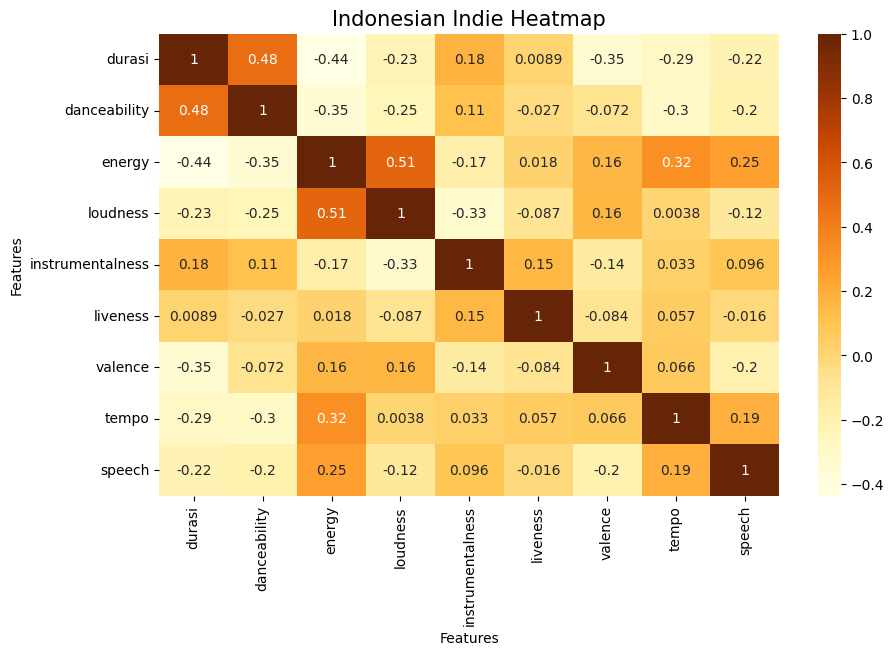

In [ ]:
figure = plt.figure(figsize=(10,6))
sns.heatmap(df_new_2[col].corr(),cmap="YlOrBr",annot=True)
plt.title("Indonesian Indie Heatmap",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [ ]:
rock = [fstvlst_data, thestrokes_data, jenny_data, MORFEM_data, jeblogs_data]
df_new_3 = pd.concat(rock)

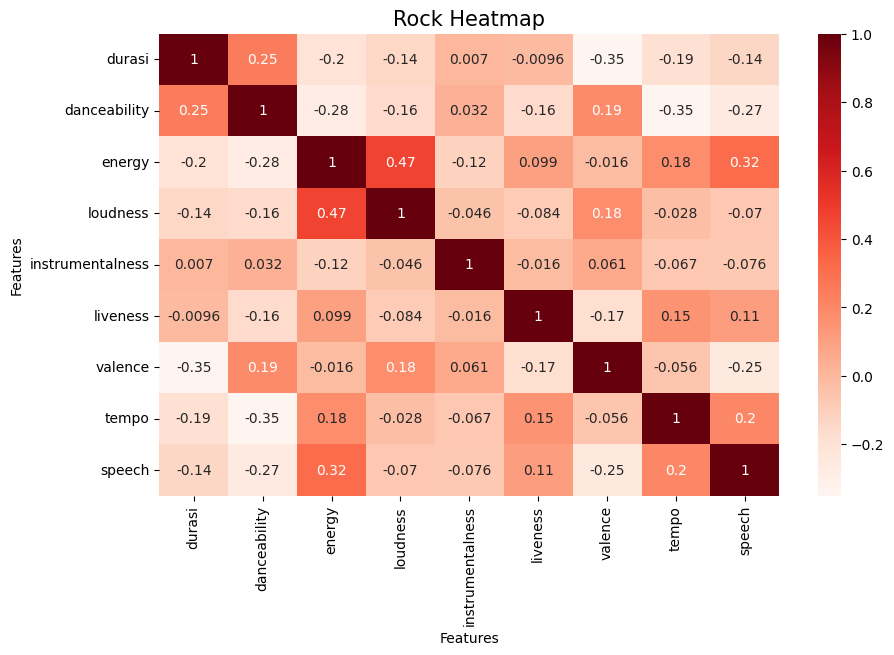

In [ ]:
figure = plt.figure(figsize=(10,6))
sns.heatmap(df_new_3[col].corr(),cmap="Reds",annot=True)
plt.title("Rock Heatmap",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [ ]:
jogindie = [fstvlst_data, thekick_data, jenny_data, jeblogs_data]
df_new_4 = pd.concat(jogindie)

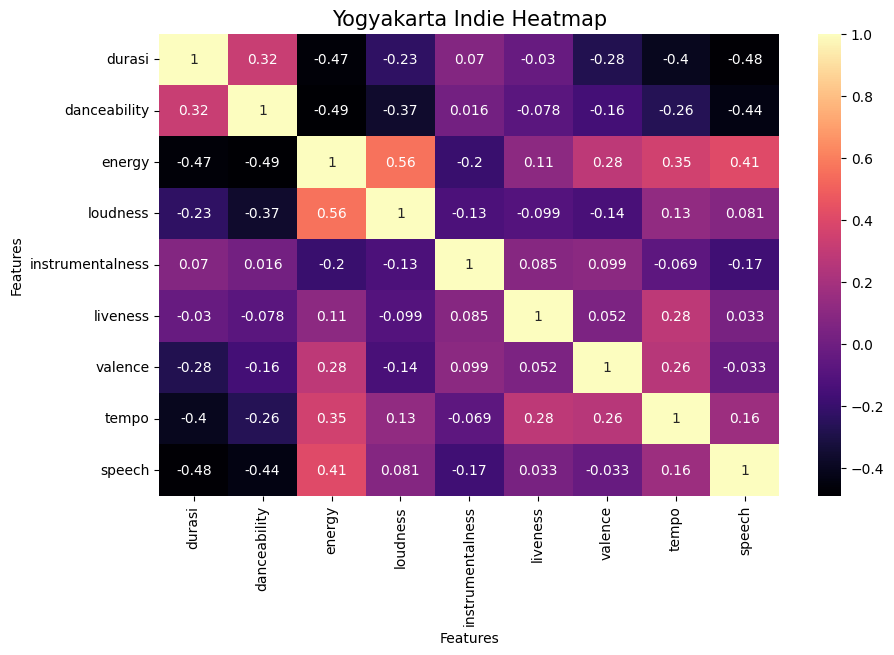

In [ ]:
figure = plt.figure(figsize=(10,6))
sns.heatmap(df_new_4[col].corr(),cmap="magma",annot=True)
plt.title("Yogyakarta Indie Heatmap",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [ ]:
permanent_wave = [jeblogs_data, thestrokes_data]
df_new_5 = pd.concat(permanent_wave)

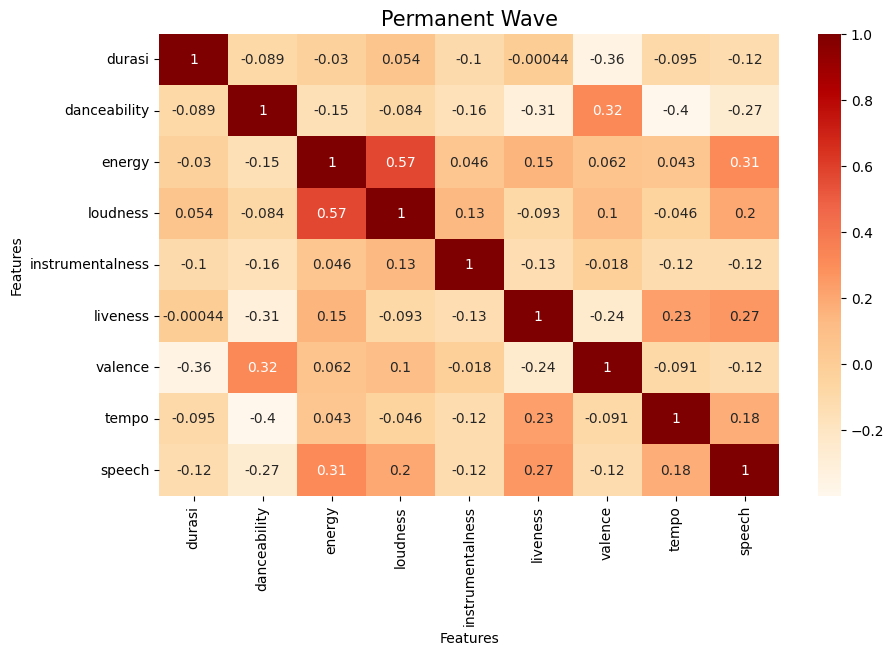

In [ ]:
figure = plt.figure(figsize=(10,6))
sns.heatmap(df_new_5[col].corr(),cmap="OrRd",annot=True)
plt.title("Permanent Wave",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [ ]:
all = [jeblogs_data, thestrokes_data, thekick_data, jenny_data, fstvlst_data, MORFEM_data, eka_data, brandals_data]
df_new_6 = pd.concat(all)

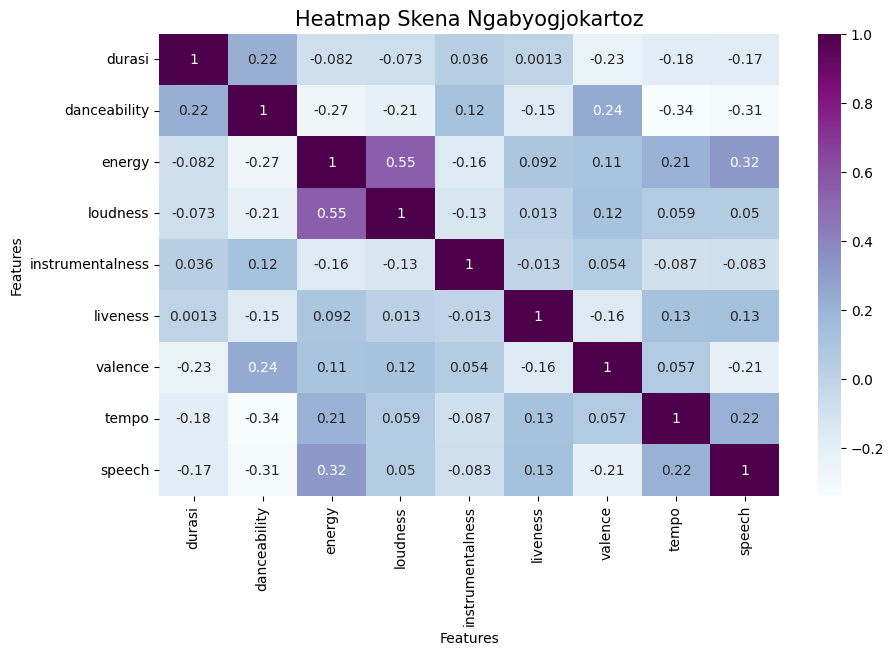

In [ ]:
figure = plt.figure(figsize=(10,6))
sns.heatmap(df_new_6[col].corr(),cmap="BuPu",annot=True)
plt.title("Heatmap Skena Ngabyogjokartoz",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()